In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import tensorflow as tf
import keras
from keras import Sequential

In [35]:
train=pd.read_csv('/content/drive/MyDrive/Datasets/time-series/DailyDelhiClimateTrain.csv')
test=pd.read_csv('/content/drive/MyDrive/Datasets/time-series/DailyDelhiClimateTest.csv')

In [36]:
train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [37]:

train_data=train['meantemp'].to_frame()
test_data=test['meantemp'].to_frame()
time=np.arange(len(test_data))

In [38]:
no_of_days=len(train_data)
no_of_months=np.round(len(train_data)/30)
no_of_years=np.round((len(train_data)/30)/12)
no_of_days,no_of_months,no_of_years

print(f' Number of Days:{no_of_days} \n Number of months:{int(no_of_months)} \n Number of years: {int(no_of_years)}')

 Number of Days:1462 
 Number of months:49 
 Number of years: 4


In [39]:
def plot_series(time,series,format='-',start=0,end=None,label=None):
  plt.plot(time[start:end],series[start:end],format,label=label)
  plt.xlabel('Day')
  plt.ylabel('Temprature')
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)


In [40]:
def window_dataset(series,window_size,batch_size=32,shuffle_buffer=1000):
  dataset=tf.data.Dataset.from_tensor_slices(series)
  dataset=dataset.window(window_size+1,shift=1,drop_remainder=True)
  dataset=dataset.flat_map(lambda window: window.batch(window_size+1))
  dataset=dataset.shuffle(shuffle_buffer)
  dataset=dataset.map(lambda window : (window[:-1],window[-1]))
  dataset=dataset.batch(batch_size).prefetch(1)
  return dataset

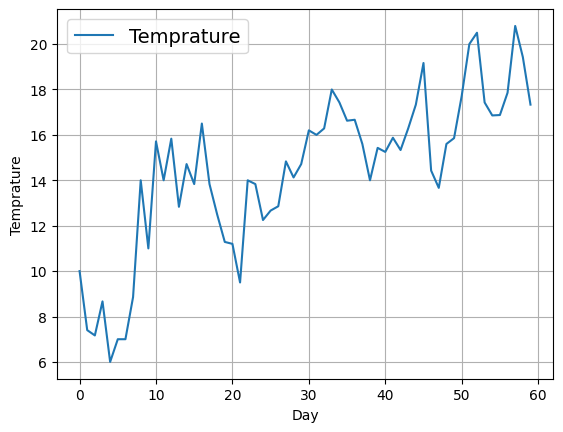

In [41]:
plot_series(time,train_data,end=60,label='Temprature')

In [42]:
window_size=7 #forecast for 1 day of next month
train_set=window_dataset(train_data,window_size)
test_set=window_dataset(test_data,window_size)
model=Sequential([
    keras.layers.Dense(1,input_shape=[window_size])
])

optimizer=keras.optimizers.SGD(learning_rate=1e-5,momentum=0.9)
model.compile(loss=keras.losses.Huber(),optimizer=optimizer,metrics=['mae'])
model.fit(train_set,epochs=50,validation_data=test_set)

Epoch 1/50
46/46 [==============================] - 1s 9ms/step - loss: 41.3416 - mae: 41.8416 - val_loss: 27.5308 - val_mae: 28.0308
Epoch 2/50
46/46 [==============================] - 0s 4ms/step - loss: 21.2095 - mae: 21.7091 - val_loss: 10.1784 - val_mae: 10.6705
Epoch 3/50
46/46 [==============================] - 0s 5ms/step - loss: 4.5759 - mae: 5.0531 - val_loss: 3.9090 - val_mae: 4.3822
Epoch 4/50
46/46 [==============================] - 0s 4ms/step - loss: 2.8316 - mae: 3.2938 - val_loss: 4.0830 - val_mae: 4.5642
Epoch 5/50
46/46 [==============================] - 0s 3ms/step - loss: 2.8137 - mae: 3.2765 - val_loss: 4.1173 - val_mae: 4.6011
Epoch 6/50
46/46 [==============================] - 0s 4ms/step - loss: 2.8020 - mae: 3.2652 - val_loss: 4.0758 - val_mae: 4.5587
Epoch 7/50
46/46 [==============================] - 0s 4ms/step - loss: 2.7823 - mae: 3.2451 - val_loss: 4.0491 - val_mae: 4.5319
Epoch 8/50
46/46 [==============================] - 0s 4ms/step - loss: 2.7689 - m

In [43]:
window_size=30
train_set=window_dataset(train_data,window_size)

model=Sequential([
    keras.layers.Dense(1,input_shape=[window_size])
])
lr_scheduler=keras.callbacks.LearningRateScheduler(lambda epoch:1e-6 * 10 **(epoch/20))
optimizer=keras.optimizers.SGD(learning_rate=1e-6,momentum=0.9)
model.compile(loss=keras.losses.Huber(),metrics=['mae'],optimizer=optimizer)
history=model.fit(train_set,epochs=100,callbacks=[lr_scheduler])


Epoch 1/100
45/45 [==============================] - 1s 7ms/step - loss: 20.2740 - mae: 20.7740 - lr: 1.0000e-06
Epoch 2/100
45/45 [==============================] - 1s 10ms/step - loss: 11.3832 - mae: 11.8816 - lr: 1.1220e-06
Epoch 3/100
45/45 [==============================] - 1s 14ms/step - loss: 3.1933 - mae: 3.6639 - lr: 1.2589e-06
Epoch 4/100
45/45 [==============================] - 1s 8ms/step - loss: 1.9658 - mae: 2.4128 - lr: 1.4125e-06
Epoch 5/100
45/45 [==============================] - 1s 16ms/step - loss: 1.9574 - mae: 2.4056 - lr: 1.5849e-06
Epoch 6/100
45/45 [==============================] - 1s 8ms/step - loss: 1.9538 - mae: 2.4023 - lr: 1.7783e-06
Epoch 7/100
45/45 [==============================] - 0s 4ms/step - loss: 1.9493 - mae: 2.3978 - lr: 1.9953e-06
Epoch 8/100
45/45 [==============================] - 0s 4ms/step - loss: 1.9467 - mae: 2.3958 - lr: 2.2387e-06
Epoch 9/100
45/45 [==============================] - 0s 3ms/step - loss: 1.9411 - mae: 2.3899 - lr: 2.511

(1e-06, 0.001, 0.0, 20.0)

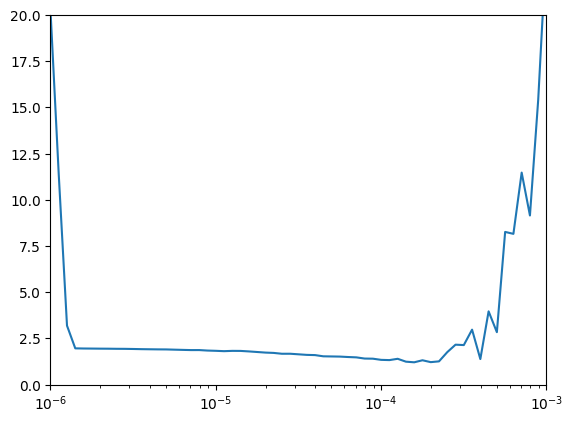

In [44]:
plt.semilogx(history.history['lr'],history.history['loss'])
plt.axis([1e-6,1e-3,0,20])

In [45]:
learning_rate=1e-4
window_size=30
train_set=window_dataset(train_data,window_size)
test_set=window_dataset(test_data,window_size)
model=Sequential([
    keras.layers.Dense(1,input_shape=[window_size])
])
optimizer=keras.optimizers.SGD(learning_rate=learning_rate,momentum=0.9)
model.compile(loss=keras.losses.Huber(),optimizer=optimizer,metrics=['mae'])
model.fit(train_set,epochs=100,validation_data=test_set)


Epoch 1/100
45/45 [==============================] - 1s 8ms/step - loss: 31.1636 - mae: 31.6584 - val_loss: 5.1738 - val_mae: 5.6637
Epoch 2/100
45/45 [==============================] - 1s 8ms/step - loss: 2.7198 - mae: 3.1825 - val_loss: 2.8860 - val_mae: 3.3378
Epoch 3/100
45/45 [==============================] - 1s 7ms/step - loss: 2.3180 - mae: 2.7786 - val_loss: 2.5435 - val_mae: 3.0078
Epoch 4/100
45/45 [==============================] - 1s 8ms/step - loss: 2.2829 - mae: 2.7414 - val_loss: 2.3523 - val_mae: 2.8041
Epoch 5/100
45/45 [==============================] - 1s 8ms/step - loss: 2.0127 - mae: 2.4658 - val_loss: 2.3551 - val_mae: 2.8099
Epoch 6/100
45/45 [==============================] - 1s 9ms/step - loss: 1.8470 - mae: 2.3032 - val_loss: 2.1301 - val_mae: 2.5648
Epoch 7/100
45/45 [==============================] - 0s 4ms/step - loss: 1.8459 - mae: 2.2978 - val_loss: 1.9061 - val_mae: 2.3477
Epoch 8/100
45/45 [==============================] - 0s 4ms/step - loss: 1.7342 -

In [46]:
def model_predication(model,series,window_size):
  ds=tf.data.Dataset.from_tensor_slices(series)
  ds=ds.window(window_size,shift=1,drop_remainder=True)
  ds=ds.flat_map(lambda window:window.batch(window_size))
  ds=ds.batch(32).prefetch(1)
  forecast=model.predict(ds)
  return forecast


In [47]:
lin_forecast=model_predication(model,test_data,window_size)[:,0]

3/3 [==============================] - 0s 8ms/step


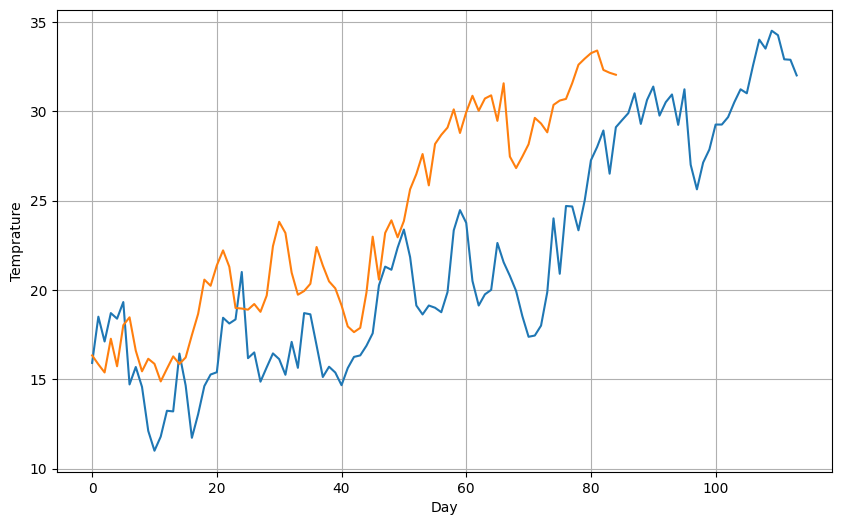

In [48]:
plt.figure(figsize=(10,6))
plot_series(time,test_data)
plot_series(time[0:85],lin_forecast)

In [49]:
window_size=30
train_set=window_dataset(train_data,window_size)
model=Sequential([
    keras.layers.Dense(64,activation='relu',input_shape=[window_size]),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(1)
])

optimizer=keras.optimizers.SGD(learning_rate=1e-6,momentum=0.90)

lr_schedule=keras.callbacks.LearningRateScheduler(
    lambda epoch : 1e-6 * 10**(epoch/20)
)

model.compile(loss=keras.losses.Huber(),optimizer=optimizer,metrics=['mae'])

history=model.fit(train_set,epochs=100,callbacks=[lr_schedule])

Epoch 1/100
45/45 [==============================] - 1s 4ms/step - loss: 9.7447 - mae: 10.2432 - lr: 1.0000e-06
Epoch 2/100
45/45 [==============================] - 0s 3ms/step - loss: 2.1175 - mae: 2.5801 - lr: 1.1220e-06
Epoch 3/100
45/45 [==============================] - 0s 3ms/step - loss: 1.7838 - mae: 2.2448 - lr: 1.2589e-06
Epoch 4/100
45/45 [==============================] - 0s 3ms/step - loss: 1.7230 - mae: 2.1799 - lr: 1.4125e-06
Epoch 5/100
45/45 [==============================] - 0s 4ms/step - loss: 1.6307 - mae: 2.0837 - lr: 1.5849e-06
Epoch 6/100
45/45 [==============================] - 0s 4ms/step - loss: 1.5639 - mae: 2.0140 - lr: 1.7783e-06
Epoch 7/100
45/45 [==============================] - 0s 3ms/step - loss: 1.5332 - mae: 1.9820 - lr: 1.9953e-06
Epoch 8/100
45/45 [==============================] - 0s 3ms/step - loss: 1.5045 - mae: 1.9521 - lr: 2.2387e-06
Epoch 9/100
45/45 [==============================] - 0s 3ms/step - loss: 1.4881 - mae: 1.9375 - lr: 2.5119e-06


(1e-07, 0.008, 0.0, 30.0)

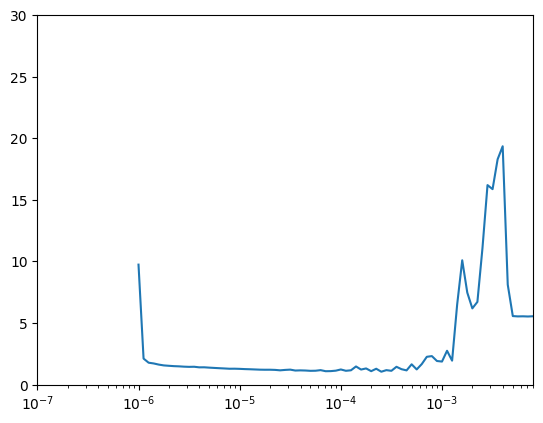

In [50]:
plt.semilogx(history.history['lr'],history.history['loss'])
plt.axis([1e-7,8e-3,0,30])

In [51]:
window_size=30
train_set=window_dataset(train_data,window_size)
test_set=window_dataset(test_data,window_size)

model=Sequential([
    keras.layers.Dense(64,activation='relu',input_shape=[window_size]),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(16),
    keras.layers.Dense(1)
])

optimizer=keras.optimizers.SGD(learning_rate=1e-4)
model.compile(loss=keras.losses.Huber(),optimizer=optimizer,metrics=['mae'])
model.fit(train_set,epochs=100,validation_data=test_set)

Epoch 1/100
45/45 [==============================] - 1s 9ms/step - loss: 6.4490 - mae: 6.9223 - val_loss: 2.5245 - val_mae: 2.9846
Epoch 2/100
45/45 [==============================] - 0s 4ms/step - loss: 2.0468 - mae: 2.5053 - val_loss: 2.1661 - val_mae: 2.6103
Epoch 3/100
45/45 [==============================] - 0s 5ms/step - loss: 1.8228 - mae: 2.2861 - val_loss: 2.0158 - val_mae: 2.4552
Epoch 4/100
45/45 [==============================] - 0s 6ms/step - loss: 1.6639 - mae: 2.1177 - val_loss: 2.3186 - val_mae: 2.7660
Epoch 5/100
45/45 [==============================] - 0s 5ms/step - loss: 1.5776 - mae: 2.0278 - val_loss: 1.9376 - val_mae: 2.3781
Epoch 6/100
45/45 [==============================] - 0s 4ms/step - loss: 1.4881 - mae: 1.9334 - val_loss: 1.8870 - val_mae: 2.3260
Epoch 7/100
45/45 [==============================] - 0s 5ms/step - loss: 1.4191 - mae: 1.8606 - val_loss: 2.0476 - val_mae: 2.4940
Epoch 8/100
45/45 [==============================] - 1s 8ms/step - loss: 1.4047 - m

In [52]:
dense_forecast=model_predication(model,test_data,window_size)[:,0]

3/3 [==============================] - 0s 9ms/step


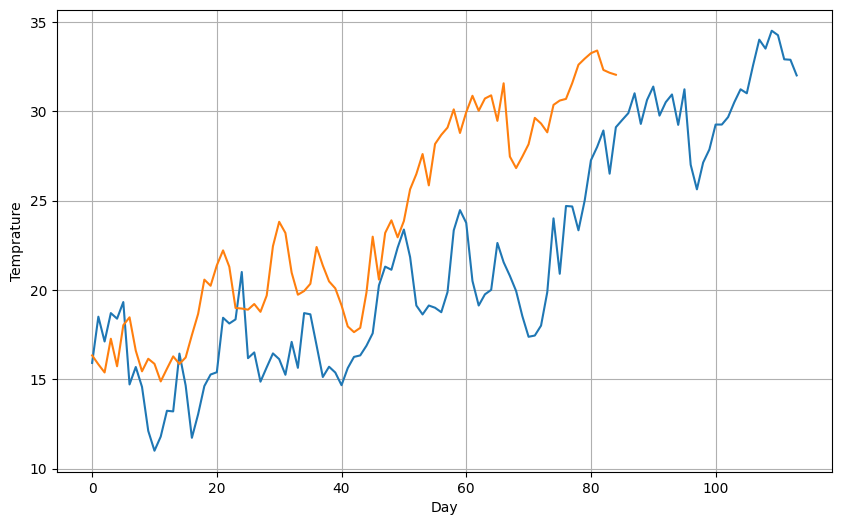

In [53]:
plt.figure(figsize=(10,6))
plot_series(time,test_data)
plot_series(time[0:85],lin_forecast)

In [54]:
keras.metrics.mean_absolute_error(test_data,dense_forecast).numpy()

array([ 7.7367043,  5.8440814,  6.755476 ,  5.7273283,  5.9107475,
        5.433691 ,  8.921673 ,  7.9489193,  9.058578 , 11.518896 ,
       12.630007 , 11.840532 , 10.394712 , 10.430006 ,  7.2888255,
        8.980007 , 11.9077835, 10.588339 ,  9.010959 ,  8.366848 ,
        8.238702 ,  5.880081 ,  6.080931 ,  5.9360714,  4.86609  ,
        7.502837 ,  7.235719 ,  8.766371 ,  7.965638 ,  7.280816 ,
        7.547826 ,  8.380007 ,  6.770449 ,  7.994515 ,  5.7273283,
        5.766772 ,  6.9229183,  8.505007 ,  7.9338737,  8.255007 ,
        8.963339 ,  8.005491 ,  7.4431734,  7.3735647,  6.933541 ,
        6.443605 ,  5.0700707,  4.8294134,  4.8486   ,  4.8498635,
        4.951199 ,  4.8201113,  5.51686  ,  5.7705636,  5.51686  ,
        5.571272 ,  5.699012 ,  5.20705  ,  4.9448266,  5.138756 ,
        5.0126667,  4.9879613,  5.51686  ,  5.2558837,  5.1585207,
        4.8713875,  4.818171 ,  4.9084496,  5.182785 ,  5.8240814,
        6.5753274,  6.5287585,  6.157056 ,  5.20705  ,  5.0567

In [55]:
window_size=30
train_set=window_dataset(train_data,window_size)

model=Sequential([
    keras.layers.Lambda(lambda x: tf.expand_dims(x,axis=-1),input_shape=[None]),
    keras.layers.SimpleRNN(100,return_sequences=True),
    keras.layers.SimpleRNN(100),
    keras.layers.Dense(1),
    keras.layers.Lambda(lambda x:x*200.0)
])

lr_schedule=keras.callbacks.LearningRateScheduler(
    lambda epoch : 1e-6 *10 **(epoch/20))

optimizer=keras.optimizers.SGD(learning_rate=1e-6)

model.compile(loss=keras.losses.Huber(),optimizer=optimizer,metrics=['mae'])

history=model.fit(train_set,epochs=50,callbacks=[lr_schedule])

Epoch 1/50
45/45 [==============================] - 3s 22ms/step - loss: 12.4281 - mae: 12.9133 - lr: 1.0000e-06
Epoch 2/50
45/45 [==============================] - 1s 21ms/step - loss: 4.6196 - mae: 5.0976 - lr: 1.1220e-06
Epoch 3/50
45/45 [==============================] - 1s 20ms/step - loss: 5.5588 - mae: 6.0442 - lr: 1.2589e-06
Epoch 4/50
45/45 [==============================] - 1s 30ms/step - loss: 6.3757 - mae: 6.8644 - lr: 1.4125e-06
Epoch 5/50
45/45 [==============================] - 1s 27ms/step - loss: 7.2445 - mae: 7.7381 - lr: 1.5849e-06
Epoch 6/50
45/45 [==============================] - 1s 20ms/step - loss: 8.2916 - mae: 8.7865 - lr: 1.7783e-06
Epoch 7/50
45/45 [==============================] - 1s 20ms/step - loss: 9.2511 - mae: 9.7484 - lr: 1.9953e-06
Epoch 8/50
45/45 [==============================] - 1s 20ms/step - loss: 10.2636 - mae: 10.7611 - lr: 2.2387e-06
Epoch 9/50
45/45 [==============================] - 1s 20ms/step - loss: 11.0952 - mae: 11.5935 - lr: 2.5119

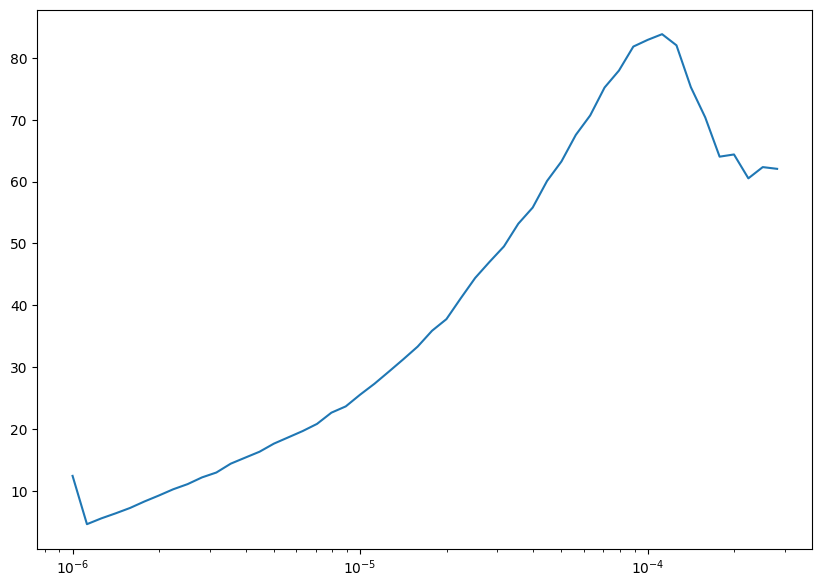

In [56]:
plt.figure(figsize=(10,7))
plt.semilogx(history.history['lr'],history.history['loss'])
plt.show()

In [57]:

def seq2seq_window_dataset(series, window_size, batch_size=32,
                           shuffle_buffer=1000):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [58]:
window_size=30
batch_size=128
train_set=window_dataset(train_data,window_size,batch_size)
test_set=window_dataset(test_data,window_size,batch_size)

model=Sequential([
    keras.layers.Lambda(lambda x:tf.expand_dims(x,axis=-1),input_shape=[None]),
    keras.layers.SimpleRNN(100,return_sequences=True),
    keras.layers.SimpleRNN(100),
    keras.layers.Dense(1),
    keras.layers.Lambda(lambda x:x*200.0)
])

optimizer=keras.optimizers.SGD(learning_rate=1e-6,momentum=0.9)
model.compile(loss=keras.losses.Huber(),optimizer=optimizer,metrics=['mae'])
model.fit(train_set,epochs=50,validation_data=test_set)

Epoch 1/50
12/12 [==============================] - 4s 130ms/step - loss: 35.3337 - mae: 35.8298 - val_loss: 25.5530 - val_mae: 26.0530
Epoch 2/50
12/12 [==============================] - 1s 40ms/step - loss: 15.5122 - mae: 16.0074 - val_loss: 3.8160 - val_mae: 4.2840
Epoch 3/50
12/12 [==============================] - 1s 47ms/step - loss: 6.1435 - mae: 6.6299 - val_loss: 4.1485 - val_mae: 4.6288
Epoch 4/50
12/12 [==============================] - 1s 43ms/step - loss: 3.8948 - mae: 4.3700 - val_loss: 2.7081 - val_mae: 3.1970
Epoch 5/50
12/12 [==============================] - 1s 41ms/step - loss: 3.0160 - mae: 3.4845 - val_loss: 2.4272 - val_mae: 2.8828
Epoch 6/50
12/12 [==============================] - 1s 41ms/step - loss: 2.6727 - mae: 3.1372 - val_loss: 2.1087 - val_mae: 2.5804
Epoch 7/50
12/12 [==============================] - 1s 44ms/step - loss: 2.3952 - mae: 2.8540 - val_loss: 2.1784 - val_mae: 2.6399
Epoch 8/50
12/12 [==============================] - 1s 43ms/step - loss: 2.2

In [59]:
rnn_forecast=model_predication(model,test_data,window_size)

3/3 [==============================] - 0s 19ms/step


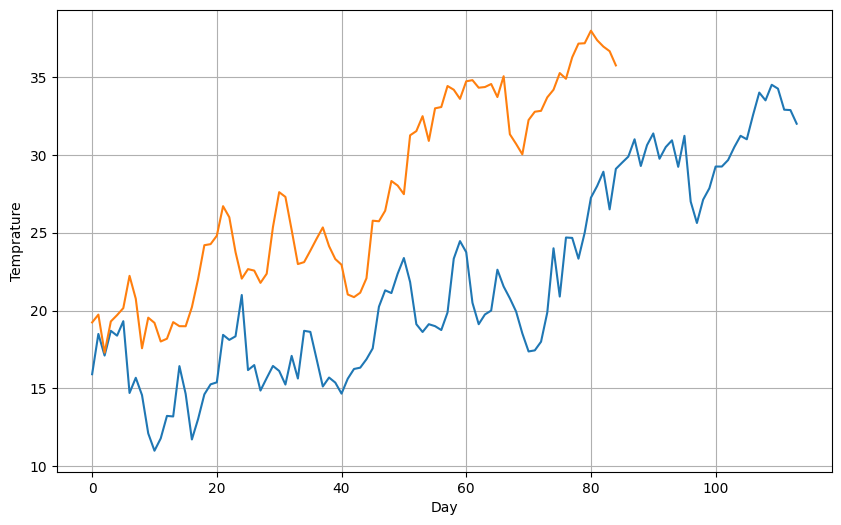

In [60]:
plt.figure(figsize=(10,6))
plot_series(time,test_data)
plot_series(time[0:85],rnn_forecast)

In [61]:
def sequnential_window_dataset(series,window_size):
  series=tf.expand_dims(series,axis=-1)
  ds=tf.data.Dataset.from_tensor_slices(series)
  ds=ds.window(window_size+1,shift=window_size,drop_remainder=True)
  ds=ds.flat_map(lambda window:window.batch(window_size+1))
  ds=ds.map(lambda window:(window[:-1], window[1:]))
  return ds.batch(1).prefetch(1)

In [62]:
for x_batch,y_batch in sequnential_window_dataset(tf.range(10),3):
  print(x_batch.numpy(),y_batch.numpy())

[[[0]
  [1]
  [2]]] [[[1]
  [2]
  [3]]]
[[[3]
  [4]
  [5]]] [[[4]
  [5]
  [6]]]
[[[6]
  [7]
  [8]]] [[[7]
  [8]
  [9]]]


In [63]:
class ResetStatesCallback(keras.callbacks.Callback):
  def on_epoch_begin(self,epoch,logs):
    self.model.reset_states()

In [64]:
window_size=20
train_set=sequnential_window_dataset(train_data,window_size)
model=Sequential([
    keras.layers.SimpleRNN(100,return_sequences=True,stateful=True,batch_input_shape=[1,None,1]),
    keras.layers.SimpleRNN(100,return_sequences=True,stateful=True),
    keras.layers.Dense(1),
    keras.layers.Lambda(lambda x:x* 200.0)
])

lr_schedule=keras.callbacks.LearningRateScheduler(
    lambda epoch:1e-6 *10 **(epoch/10))

optimizer=keras.optimizers.SGD(learning_rate=1e-6)
model.compile(loss=keras.losses.Huber(),optimizer=optimizer,metrics=['mae'])
history=model.fit(train_set,epochs=50,callbacks=[lr_schedule])

Epoch 1/50
73/73 [==============================] - 4s 15ms/step - loss: 20.1444 - mae: 20.6374 - lr: 1.0000e-06
Epoch 2/50
73/73 [==============================] - 1s 14ms/step - loss: 9.8774 - mae: 10.3677 - lr: 1.2589e-06
Epoch 3/50
73/73 [==============================] - 1s 10ms/step - loss: 8.8779 - mae: 9.3639 - lr: 1.5849e-06
Epoch 4/50
73/73 [==============================] - 1s 9ms/step - loss: 9.5972 - mae: 10.0879 - lr: 1.9953e-06
Epoch 5/50
73/73 [==============================] - 1s 9ms/step - loss: 12.1112 - mae: 12.6046 - lr: 2.5119e-06
Epoch 6/50
73/73 [==============================] - 1s 9ms/step - loss: 14.9408 - mae: 15.4358 - lr: 3.1623e-06
Epoch 7/50
73/73 [==============================] - 1s 9ms/step - loss: 17.6283 - mae: 18.1273 - lr: 3.9811e-06
Epoch 8/50
73/73 [==============================] - 1s 9ms/step - loss: 20.5081 - mae: 21.0076 - lr: 5.0119e-06
Epoch 9/50
73/73 [==============================] - 1s 8ms/step - loss: 22.5103 - mae: 23.0097 - lr: 6.30

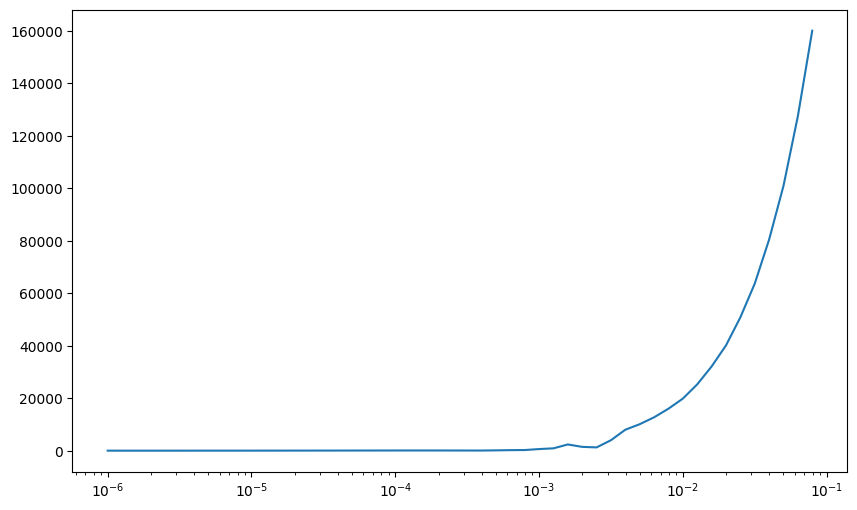

In [65]:
plt.figure(figsize=(10,6))
plt.semilogx(history.history['lr'],history.history['loss'])
plt.show()

In [66]:
window_size=30
train_set=sequnential_window_dataset(train_data,window_size)
test_set=sequnential_window_dataset(test_data,window_size)

model=Sequential([
    keras.layers.SimpleRNN(100,return_sequences=True,stateful=True,batch_input_shape=[1,None,1]),
    keras.layers.SimpleRNN(100,return_sequences=True,stateful=True),
    keras.layers.Dense(1),
    keras.layers.Lambda(lambda x: x*200.0)
])
optimizer=keras.optimizers.SGD(learning_rate=1e-3,momentum=0.90)
model.compile(loss=keras.losses.Huber(),optimizer=optimizer,metrics=['mae'])
reset_states=ResetStatesCallback()
model.fit(train_set,epochs=100,validation_data=test_set,callbacks=[reset_states])

Epoch 1/100
48/48 [==============================] - 4s 31ms/step - loss: 3023.3972 - mae: 3023.8962 - val_loss: 1572.9984 - val_mae: 1573.4983
Epoch 2/100
48/48 [==============================] - 1s 12ms/step - loss: 3044.3269 - mae: 3044.8267 - val_loss: 1566.0063 - val_mae: 1566.5062
Epoch 3/100
48/48 [==============================] - 1s 13ms/step - loss: 3044.4509 - mae: 3044.9507 - val_loss: 1554.8698 - val_mae: 1555.3698
Epoch 4/100
48/48 [==============================] - 1s 13ms/step - loss: 3044.5938 - mae: 3045.0940 - val_loss: 1538.4261 - val_mae: 1538.9263
Epoch 5/100
48/48 [==============================] - 1s 12ms/step - loss: 3044.5403 - mae: 3045.0403 - val_loss: 1523.2734 - val_mae: 1523.7736
Epoch 6/100
48/48 [==============================] - 1s 12ms/step - loss: 3044.6570 - mae: 3045.1570 - val_loss: 1504.6078 - val_mae: 1505.1077
Epoch 7/100
48/48 [==============================] - 1s 13ms/step - loss: 3044.7107 - mae: 3045.2112 - val_loss: 1479.9828 - val_mae: 14

In [69]:
window_size=30
train_set=sequnential_window_dataset(train_data,window_size)

model=Sequential([
    keras.layers.LSTM(100,return_sequences=True,stateful=True,batch_input_shape=[1,None,1]),
    keras.layers.LSTM(62,return_sequences=True,stateful=True),
    keras.layers.Dense(1),
    keras.layers.Lambda(lambda x:x*200.0)
])

lr_schedule=keras.callbacks.LearningRateScheduler(
    lambda epoch:1e-6*10**(epoch/20))

reset_states=ResetStatesCallback()

optimizer=keras.optimizers.SGD(learning_rate=1e-6,momentum=0.9)

model.compile(loss=keras.losses.Huber(),optimizer=optimizer,metrics=['mae'])
history=model.fit(train_set,epochs=50,callbacks=[lr_schedule,reset_states])

Epoch 1/50
48/48 [==============================] - 11s 59ms/step - loss: 10.1743 - mae: 10.6654 - lr: 1.0000e-06
Epoch 2/50
48/48 [==============================] - 3s 55ms/step - loss: 7.0205 - mae: 7.5052 - lr: 1.1220e-06
Epoch 3/50
48/48 [==============================] - 4s 74ms/step - loss: 6.3823 - mae: 6.8686 - lr: 1.2589e-06
Epoch 4/50
48/48 [==============================] - 3s 57ms/step - loss: 4.7071 - mae: 5.1819 - lr: 1.4125e-06
Epoch 5/50
48/48 [==============================] - 3s 59ms/step - loss: 6.8430 - mae: 7.3230 - lr: 1.5849e-06
Epoch 6/50
48/48 [==============================] - 3s 70ms/step - loss: 5.7632 - mae: 6.2511 - lr: 1.7783e-06
Epoch 7/50
48/48 [==============================] - 3s 62ms/step - loss: 4.5410 - mae: 5.0141 - lr: 1.9953e-06
Epoch 8/50
48/48 [==============================] - 3s 57ms/step - loss: 7.5650 - mae: 8.0574 - lr: 2.2387e-06
Epoch 9/50
48/48 [==============================] - 2s 50ms/step - loss: 3.0513 - mae: 3.5168 - lr: 2.5119e-0

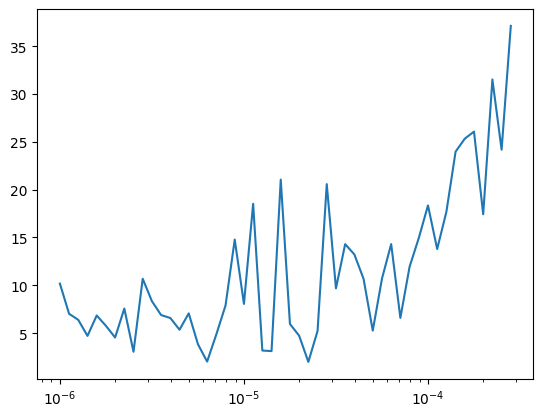

In [72]:
plt.semilogx(history.history['lr'],history.history['loss'])

plt.show()

In [75]:
window_size=30

train_set=sequnential_window_dataset(train_data,window_size)
test_set=sequnential_window_dataset(test_data,window_size)

model=Sequential([
    keras.layers.LSTM(100,return_sequences=True,stateful=True,batch_input_shape=[1,None,1]),
    keras.layers.LSTM(60,return_sequences=True,stateful=True),
    keras.layers.Dense(1),
    keras.layers.Lambda(lambda x:x*200.0)
])
optimizer=keras.optimizers.SGD(learning_rate=1e-5,momentum=0.9)
reset_state=ResetStatesCallback()
model.compile(loss=keras.losses.Huber(),optimizer=optimizer,metrics=['mae'])
model.fit(train_set,epochs=50,validation_data=test_set,callbacks=[reset_state])

Epoch 1/50
48/48 [==============================] - 11s 103ms/step - loss: 24.1487 - mae: 24.6446 - val_loss: 8.0625 - val_mae: 8.5546
Epoch 2/50
48/48 [==============================] - 3s 61ms/step - loss: 23.5035 - mae: 24.0022 - val_loss: 29.0912 - val_mae: 29.5912
Epoch 3/50
48/48 [==============================] - 3s 56ms/step - loss: 17.6267 - mae: 18.1206 - val_loss: 3.3664 - val_mae: 3.8265
Epoch 4/50
48/48 [==============================] - 4s 78ms/step - loss: 1.9557 - mae: 2.4082 - val_loss: 1.7801 - val_mae: 2.2118
Epoch 5/50
48/48 [==============================] - 3s 63ms/step - loss: 7.0866 - mae: 7.5745 - val_loss: 11.9565 - val_mae: 12.4543
Epoch 6/50
48/48 [==============================] - 2s 52ms/step - loss: 8.6211 - mae: 9.0995 - val_loss: 1.9634 - val_mae: 2.4305
Epoch 7/50
48/48 [==============================] - 3s 60ms/step - loss: 3.0727 - mae: 3.5307 - val_loss: 7.4388 - val_mae: 7.9388
Epoch 8/50
48/48 [==============================] - 3s 56ms/step - loss

In [100]:
window_size=30
train_set=seq2seq_window_dataset(test_data,window_size,batch_size=128)
model=Sequential([
    keras.layers.Conv1D(filters=32,kernel_size=7,strides=1,padding='causal',input_shape=[None,1],activation='relu'),
    keras.layers.LSTM(32,return_sequences=True),
    keras.layers.LSTM(32,return_sequences=True),
    keras.layers.Dense(1),
    keras.layers.Lambda(lambda x:x*200.0)
])

lr_schedule=keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-6 * 10 **(epoch/20))

optimizer=keras.optimizers.SGD(learning_rate=1e-6,momentum=0.9)
model.compile(loss=keras.losses.Huber(),optimizer=optimizer,metrics=['mae'])
history=model.fit(train_set,epochs=50,callbacks=[lr_schedule])

Epoch 1/50
1/1 [==============================] - 61s 61s/step - loss: 59.2641 - mae: 59.7630 - lr: 1.0000e-06
Epoch 2/50
1/1 [==============================] - 0s 64ms/step - loss: 43.6356 - mae: 44.1345 - lr: 1.1220e-06
Epoch 3/50
1/1 [==============================] - 0s 61ms/step - loss: 32.8179 - mae: 33.3167 - lr: 1.2589e-06
Epoch 4/50
1/1 [==============================] - 0s 59ms/step - loss: 24.8639 - mae: 25.3625 - lr: 1.4125e-06
Epoch 5/50
1/1 [==============================] - 0s 60ms/step - loss: 16.3029 - mae: 16.7946 - lr: 1.5849e-06
Epoch 6/50
1/1 [==============================] - 0s 56ms/step - loss: 9.9842 - mae: 10.4736 - lr: 1.7783e-06
Epoch 7/50
1/1 [==============================] - 0s 59ms/step - loss: 10.6239 - mae: 11.1087 - lr: 1.9953e-06
Epoch 8/50
1/1 [==============================] - 0s 65ms/step - loss: 15.5295 - mae: 16.0260 - lr: 2.2387e-06
Epoch 9/50
1/1 [==============================] - 0s 60ms/step - loss: 17.5707 - mae: 18.0672 - lr: 2.5119e-06
Ep

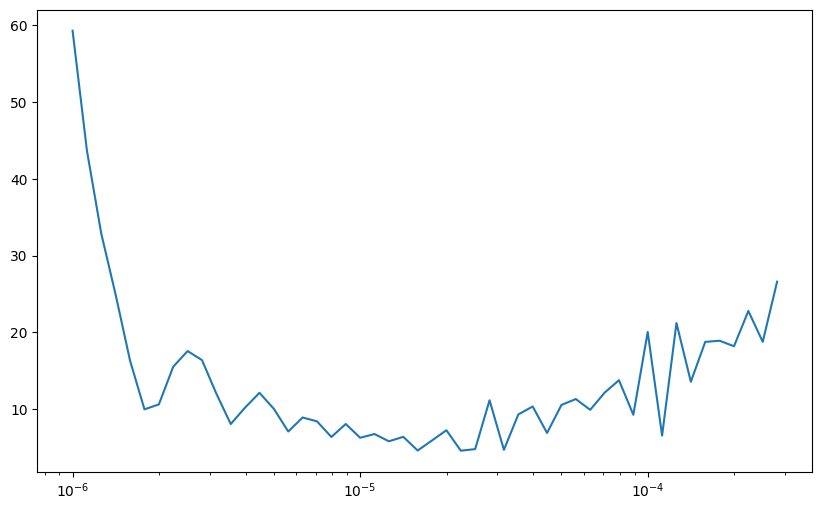

In [101]:
plt.figure(figsize=(10,6))
plt.semilogx(history.history['lr'],history.history['loss'])
plt.show()


In [105]:
window_size=30
train_set=seq2seq_window_dataset(train_data,window_size,batch_size=128)
test_set=seq2seq_window_dataset(test_data,window_size,batch_size=128)

model=Sequential([
    keras.layers.Conv1D(filters=32,kernel_size=5,strides=1,padding='causal',activation='relu',input_shape=[None,1]),
    keras.layers.LSTM(32,return_sequences=True),
    keras.layers.LSTM(32,return_sequences=True),
    keras.layers.Dense(1),
    keras.layers.Lambda(lambda x:x*200.0)
])
optimizer=keras.optimizers.SGD(learning_rate=1e-5,momentum=0.9)
model.compile(loss=keras.losses.Huber(),optimizer=optimizer,metrics=['mae'])
model.fit(train_set,epochs=50,validation_data=test_set)

Epoch 1/50
12/12 [==============================] - 11s 249ms/step - loss: 9.6319 - mae: 10.1247 - val_loss: 4.8449 - val_mae: 5.3305
Epoch 2/50
12/12 [==============================] - 1s 86ms/step - loss: 4.4307 - mae: 4.9110 - val_loss: 4.2696 - val_mae: 4.7548
Epoch 3/50
12/12 [==============================] - 2s 141ms/step - loss: 2.9854 - mae: 3.4544 - val_loss: 2.7059 - val_mae: 3.1665
Epoch 4/50
12/12 [==============================] - 2s 121ms/step - loss: 2.3962 - mae: 2.8559 - val_loss: 2.4568 - val_mae: 2.9298
Epoch 5/50
12/12 [==============================] - 1s 85ms/step - loss: 1.9816 - mae: 2.4326 - val_loss: 2.1838 - val_mae: 2.6403
Epoch 6/50
12/12 [==============================] - 1s 86ms/step - loss: 1.7566 - mae: 2.2002 - val_loss: 1.9372 - val_mae: 2.3938
Epoch 7/50
12/12 [==============================] - 1s 85ms/step - loss: 1.5948 - mae: 2.0332 - val_loss: 1.7968 - val_mae: 2.2558
Epoch 8/50
12/12 [==============================] - 1s 87ms/step - loss: 1.546

In [112]:
conv_forecast=model.predict(test_data)[:,0]
conv_forecast.shape

4/4 [==============================] - 0s 5ms/step


(114, 1)

In [111]:
test_data.shape

(114, 1)

In [115]:
time

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113])

In [116]:
keras.metrics.mean_absolute_error(test_data,conv_forecast).numpy()

array([2.5729952 , 1.8561726 , 2.2432232 , 1.7994347 , 1.8875561 ,
       1.6218452 , 2.9091425 , 2.6362276 , 2.948038  , 3.6957016 ,
       4.0800867 , 3.8031473 , 3.3402634 , 3.3510084 , 2.4293308 ,
       2.9256973 , 3.825986  , 3.399516  , 2.9344902 , 2.7531958 ,
       2.717493  , 1.8731327 , 1.9638023 , 1.8991337 , 1.1171246 ,
       2.4998188 , 2.4113941 , 2.8652344 , 2.6410837 , 2.426672  ,
       2.5145702 , 2.7568665 , 2.2487946 , 2.6494732 , 1.7994347 ,
       1.8188801 , 2.304432  , 2.7918053 , 2.6318579 , 2.7220325 ,
       2.9209623 , 2.6526222 , 2.4801598 , 2.4572353 , 2.308258  ,
       2.1159954 , 1.3465672 , 1.0231457 , 1.0781269 , 0.6788502 ,
       0.33413315, 0.85273933, 1.6777306 , 1.8207493 , 1.6777306 ,
       1.7136974 , 1.785202  , 1.458561  , 0.34868813, 0.0565033 ,
       0.2017479 , 1.2709236 , 1.6777267 , 1.4955177 , 1.4214191 ,
       0.59144783, 0.9452629 , 1.183464  , 1.440012  , 1.8467388 ,
       2.1703758 , 2.1511688 , 1.9967251 , 1.458561  , 0.11207

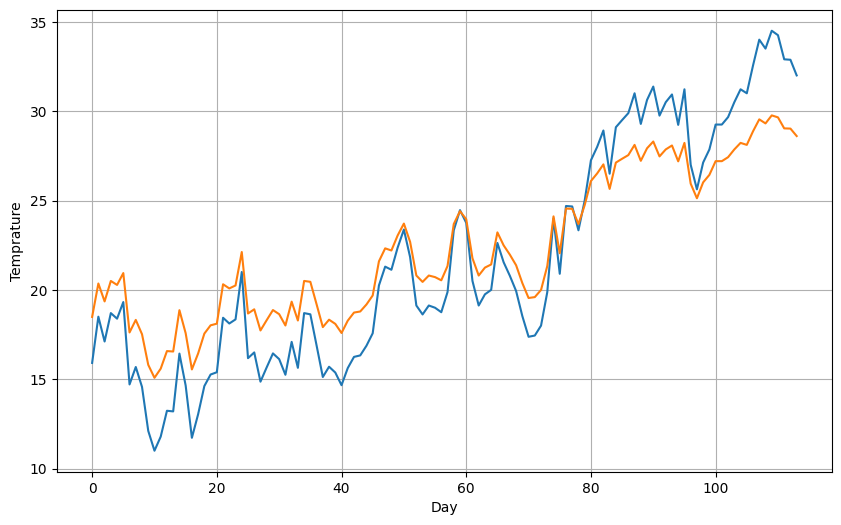

In [117]:
plt.figure(figsize=(10,6))
plot_series(time,test_data)
plot_series(time,conv_forecast)

In [122]:
window_size=30
train_set=seq2seq_window_dataset(train_data,window_size,batch_size=128)
model=Sequential()
for dilation in [1,2,4,8,16,32]:
  model.add(keras.layers.Conv1D(filters=32,
                                kernel_size=7,
                                strides=1,
                                dilation_rate=dilation,
                                padding='causal',
                                activation='relu'))

model.add(keras.layers.Conv1D(filters=1,kernel_size=1))

lr_schedule=keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 *10**(epoch/20))

optimizer=keras.optimizers.SGD(learning_rate=1e-6,momentum=0.9)

model.compile(loss=keras.losses.Huber(),optimizer=optimizer,metrics=['mae'])
history=model.fit(train_set,epochs=50,callbacks=[lr_schedule])

Epoch 1/50
12/12 [==============================] - 17s 1s/step - loss: 25.2414 - mae: 25.7414 - lr: 1.0000e-04
Epoch 2/50
12/12 [==============================] - 14s 1s/step - loss: 25.2264 - mae: 25.7264 - lr: 1.1220e-04
Epoch 3/50
12/12 [==============================] - 15s 1s/step - loss: 25.2082 - mae: 25.7082 - lr: 1.2589e-04
Epoch 4/50
12/12 [==============================] - 14s 1s/step - loss: 25.1881 - mae: 25.6881 - lr: 1.4125e-04
Epoch 5/50
12/12 [==============================] - 14s 1s/step - loss: 25.1652 - mae: 25.6652 - lr: 1.5849e-04
Epoch 6/50
12/12 [==============================] - 14s 1s/step - loss: 25.1395 - mae: 25.6395 - lr: 1.7783e-04
Epoch 7/50
12/12 [==============================] - 14s 1s/step - loss: 25.1104 - mae: 25.6104 - lr: 1.9953e-04
Epoch 8/50
12/12 [==============================] - 14s 1s/step - loss: 25.0774 - mae: 25.5774 - lr: 2.2387e-04
Epoch 9/50
12/12 [==============================] - 15s 1s/step - loss: 25.0403 - mae: 25.5403 - lr: 2.5

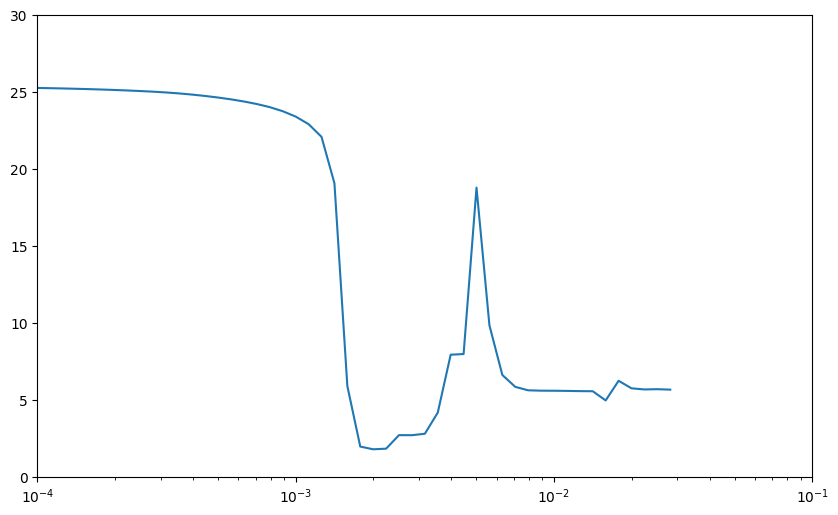

In [124]:
plt.figure(figsize=(10,6))
plt.semilogx(history.history['lr'],history.history['loss'])
plt.axis([1e-4,1e-1,0,30])
plt.show()

In [126]:
window_size=32
train_set=seq2seq_window_dataset(train_data,window_size,batch_size=128)
test_set=seq2seq_window_dataset(test_data,window_size,batch_size=128)

model=Sequential()
for dilation in [1,2,4,8,16,32]:
  model.add(keras.layers.Conv1D( filters=32,
                                kernel_size=7,
                                 strides=1,
                                 dilation_rate=dilation,
                                 padding='causal',
                                 activation='relu'))

model.add(keras.layers.Conv1D(filters=1,kernel_size=1))
optimizer=keras.optimizers.SGD(learning_rate==1e-2)
model.compile(loss=keras.losses.Huber(),optimizer=optimizer,metrics=['mae'])
model.fit(train_set,epochs=50,validation_data=test_set)


Epoch 1/50
12/12 [==============================] - 29s 2s/step - loss: 25.2597 - mae: 25.7597 - val_loss: 20.6427 - val_mae: 21.1427
Epoch 2/50
12/12 [==============================] - 22s 2s/step - loss: 25.2597 - mae: 25.7597 - val_loss: 20.6427 - val_mae: 21.1427
Epoch 3/50
12/12 [==============================] - 25s 2s/step - loss: 25.2597 - mae: 25.7597 - val_loss: 20.6427 - val_mae: 21.1427
Epoch 4/50
12/12 [==============================] - 15s 1s/step - loss: 25.2597 - mae: 25.7597 - val_loss: 20.6427 - val_mae: 21.1427
Epoch 5/50
12/12 [==============================] - 15s 1s/step - loss: 25.2597 - mae: 25.7597 - val_loss: 20.6427 - val_mae: 21.1427
Epoch 6/50
12/12 [==============================] - 15s 1s/step - loss: 25.2597 - mae: 25.7597 - val_loss: 20.6427 - val_mae: 21.1427
Epoch 7/50
12/12 [==============================] - 16s 1s/step - loss: 25.2597 - mae: 25.7597 - val_loss: 20.6427 - val_mae: 21.1427
Epoch 8/50
12/12 [==============================] - 16s 1s/ste